In [8]:
# Copy semua kode ini ke satu cell di Jupyter Notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [9]:
# 1. LOAD DATA
# Pastikan nama file sesuai dengan yang kamu punya
filename = "clusteringmidterm.csv"
try:
    df = pd.read_csv(filename)
    print("Berhasil load data!")
except FileNotFoundError:
    print(f"ERROR: File {filename} tidak ditemukan di folder ini.")

Berhasil load data!


In [10]:
# 2. BERSIHKAN DATA
if 'CUST_ID' in df.columns:
    df = df.drop('CUST_ID', axis=1) # Hapus ID

df.fillna(df.mean(), inplace=True) # Isi data kosong

In [11]:
# 3. SCALING (Penting buat Clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [12]:
# 4. TRAINING MODEL (K-MEANS)
# Kita set 4 cluster (kelompok)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
labels = kmeans.fit_predict(df_scaled)
# Masukkan hasil ke data asli
df['CLUSTER'] = labels
print("\nJumlah Customer per Cluster:")
print(df['CLUSTER'].value_counts())


Jumlah Customer per Cluster:
CLUSTER
3    3976
0    3367
2    1198
1     409
Name: count, dtype: int64


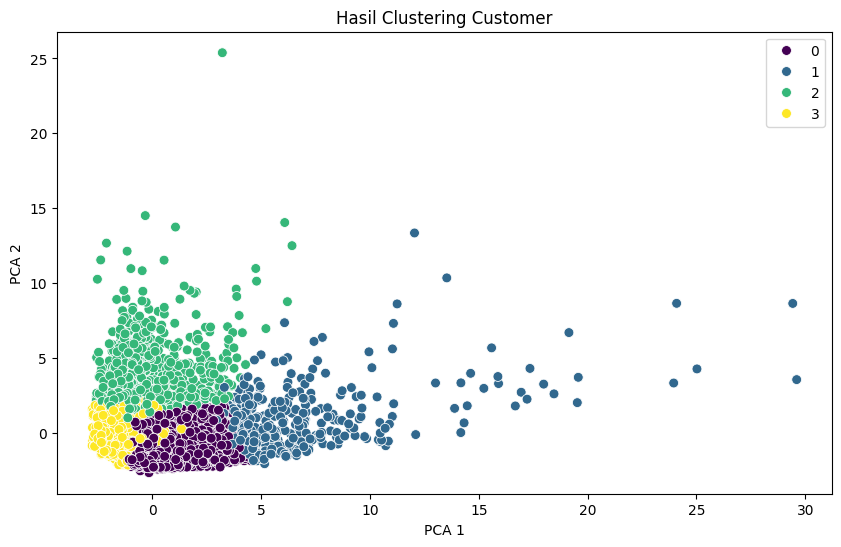

In [13]:
# 5. VISUALISASI GAMBAR
pca = PCA(n_components=2)
res_pca = pca.fit_transform(df_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=res_pca[:,0], y=res_pca[:,1], hue=labels, palette='viridis', s=50)
plt.title('Hasil Clustering Customer')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()